# FB Prophet Model - Unemployment Rate (%)

Training (1997-2020), Training (2021-2023)

# Packages & Data Loading

## Packages

In [1]:
# Import packages
import pandas as pd
import numpy as np
from prophet import Prophet
from prophet.diagnostics import cross_validation, performance_metrics
from sklearn.metrics import mean_squared_error, mean_absolute_error
import optuna
from io import StringIO
import requests
import matplotlib.pyplot as plt

from prophet.plot import plot_plotly, plot_components_plotly
import plotly.graph_objects as go
import plotly.io as pio

## Data Loading

In [2]:
# Load data from Google Drive
file_id = '117pk3NKZPfYmHQyP452HeMV7_8Jq6_W0'

# Create the download URL
download_url = f'https://drive.google.com/uc?export=download&id={file_id}'

# Use requests to get file content
response = requests.get(download_url)
response.raise_for_status()  # Ensure no error occurred

# Load the CSV directly into a DataFrame
csv_data = StringIO(response.text)
df = pd.read_csv(csv_data)

In [3]:
# Prepare and process data
df_selected = df[['ref_date', 'value_unemployment']].copy()
df_grouped = df_selected.groupby('ref_date').agg(
    median_unemployment=('value_unemployment', 'median')
).reset_index()
df_grouped['ref_date'] = pd.to_datetime(df_grouped['ref_date'])
df_grouped.set_index('ref_date', inplace=True)

# FB Prophet Model

## Assign Training & Testing Sets

In [4]:
# Split into training and testing sets
train_data = df_grouped['1997-01-01':'2020-12-01']
test_data = df_grouped['2021-01-01':'2023-12-01']
train_data = train_data.reset_index().rename(columns={'ref_date': 'ds', 'median_unemployment': 'y'})
test_data = test_data.reset_index().rename(columns={'ref_date': 'ds', 'median_unemployment': 'y'})


# Cross Validation

In [5]:
# Optuna optimization
def optimize_prophet(trial):
    # Define hyperparameters
    changepoint_prior_scale = trial.suggest_float('changepoint_prior_scale', 0.001, 0.5, log=True)
    seasonality_prior_scale = trial.suggest_float('seasonality_prior_scale', 0.01, 10.0, log=True)
    holidays_prior_scale = trial.suggest_float('holidays_prior_scale', 0.01, 10.0, log=True)
    seasonality_mode = trial.suggest_categorical('seasonality_mode', ['additive', 'multiplicative'])

    # Initialize model with suggested parameters
    model = Prophet(
        changepoint_prior_scale=changepoint_prior_scale,
        seasonality_prior_scale=seasonality_prior_scale,
        holidays_prior_scale=holidays_prior_scale,
        seasonality_mode=seasonality_mode
    )
    model.fit(train_data)

    # Perform cross-validation
    df_cv = cross_validation(model, initial='7300 days', period='365 days', horizon='365 days')
    df_p = performance_metrics(df_cv)
    return df_p['rmse'].mean()

# Model Parameters

In [6]:
# Optimize using Optuna
study = optuna.create_study(direction='minimize')
study.optimize(optimize_prophet, n_trials=50)

# Best parameters
best_params = study.best_params
print("\n\nBest Parameters:", best_params)

# Train model with optimized parameters
optimized_model = Prophet(**best_params)
optimized_model.fit(train_data)

[I 2024-11-30 20:20:23,375] A new study created in memory with name: no-name-508894ee-2337-44e6-b8be-39255275a469
20:20:23 - cmdstanpy - INFO - Chain [1] start processing
20:20:23 - cmdstanpy - INFO - Chain [1] done processing
20:20:23 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
20:20:23 - cmdstanpy - INFO - Chain [1] start processing
20:20:24 - cmdstanpy - INFO - Chain [1] done processing


  0%|          | 0/3 [00:00<?, ?it/s]

20:20:24 - cmdstanpy - INFO - Chain [1] start processing
20:20:24 - cmdstanpy - INFO - Chain [1] done processing
20:20:24 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
20:20:24 - cmdstanpy - INFO - Chain [1] start processing
20:20:24 - cmdstanpy - INFO - Chain [1] done processing
20:20:25 - cmdstanpy - INFO - Chain [1] start processing
20:20:25 - cmdstanpy - INFO - Chain [1] done processing
20:20:25 - cmdstanpy - INFO - Chain [1] start processing
20:20:25 - cmdstanpy - INFO - Chain [1] done processing
[I 2024-11-30 20:20:25,429] Trial 0 finished with value: 3.196134907736516 and parameters: {'changepoint_prior_scale': 0.001092787557331308, 'seasonality_prior_scale': 0.36319822687989745, 'holidays_prior_scale': 0.24546268414167582, 'seasonality_mode': 'additive'}. Best is trial 0 with value: 3.196134907736516.
20:20:25 - cmdstanpy - INFO - Chain [1] start processing
20:20:25 - cmdstanpy 

  0%|          | 0/3 [00:00<?, ?it/s]

20:20:26 - cmdstanpy - INFO - Chain [1] start processing
20:20:26 - cmdstanpy - INFO - Chain [1] done processing
20:20:26 - cmdstanpy - INFO - Chain [1] start processing
20:20:26 - cmdstanpy - INFO - Chain [1] done processing
20:20:26 - cmdstanpy - INFO - Chain [1] start processing
20:20:26 - cmdstanpy - INFO - Chain [1] done processing
[I 2024-11-30 20:20:26,793] Trial 1 finished with value: 2.9037041527259997 and parameters: {'changepoint_prior_scale': 0.0027112352389393646, 'seasonality_prior_scale': 0.6982205664092109, 'holidays_prior_scale': 0.013562582808040806, 'seasonality_mode': 'additive'}. Best is trial 1 with value: 2.9037041527259997.
20:20:26 - cmdstanpy - INFO - Chain [1] start processing
20:20:26 - cmdstanpy - INFO - Chain [1] done processing


  0%|          | 0/3 [00:00<?, ?it/s]

20:20:27 - cmdstanpy - INFO - Chain [1] start processing
20:20:27 - cmdstanpy - INFO - Chain [1] done processing
20:20:27 - cmdstanpy - INFO - Chain [1] start processing
20:20:27 - cmdstanpy - INFO - Chain [1] done processing
20:20:27 - cmdstanpy - INFO - Chain [1] start processing
20:20:27 - cmdstanpy - INFO - Chain [1] done processing
[I 2024-11-30 20:20:27,716] Trial 2 finished with value: 2.8777344024631706 and parameters: {'changepoint_prior_scale': 0.15739073167086293, 'seasonality_prior_scale': 0.192315557832559, 'holidays_prior_scale': 4.650411526667321, 'seasonality_mode': 'multiplicative'}. Best is trial 2 with value: 2.8777344024631706.
20:20:27 - cmdstanpy - INFO - Chain [1] start processing
20:20:27 - cmdstanpy - INFO - Chain [1] done processing
20:20:27 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
20:20:27 - cmdstanpy - INFO - Chain [1] start processing
20:20:28 - cmdstan

  0%|          | 0/3 [00:00<?, ?it/s]

20:20:28 - cmdstanpy - INFO - Chain [1] start processing
20:20:28 - cmdstanpy - INFO - Chain [1] done processing
20:20:28 - cmdstanpy - INFO - Chain [1] start processing
20:20:28 - cmdstanpy - INFO - Chain [1] done processing
20:20:29 - cmdstanpy - INFO - Chain [1] start processing
20:20:29 - cmdstanpy - INFO - Chain [1] done processing
[I 2024-11-30 20:20:29,216] Trial 3 finished with value: 2.913090599164147 and parameters: {'changepoint_prior_scale': 0.0022706225152699126, 'seasonality_prior_scale': 0.05244735629144449, 'holidays_prior_scale': 0.025738070569855095, 'seasonality_mode': 'additive'}. Best is trial 2 with value: 2.8777344024631706.
20:20:29 - cmdstanpy - INFO - Chain [1] start processing
20:20:29 - cmdstanpy - INFO - Chain [1] done processing


  0%|          | 0/3 [00:00<?, ?it/s]

20:20:29 - cmdstanpy - INFO - Chain [1] start processing
20:20:29 - cmdstanpy - INFO - Chain [1] done processing
20:20:29 - cmdstanpy - INFO - Chain [1] start processing
20:20:29 - cmdstanpy - INFO - Chain [1] done processing
20:20:29 - cmdstanpy - INFO - Chain [1] start processing
20:20:30 - cmdstanpy - INFO - Chain [1] done processing
[I 2024-11-30 20:20:30,096] Trial 4 finished with value: 2.8378776808294597 and parameters: {'changepoint_prior_scale': 0.05135019938955542, 'seasonality_prior_scale': 0.051693401880754164, 'holidays_prior_scale': 2.1686750465077096, 'seasonality_mode': 'multiplicative'}. Best is trial 4 with value: 2.8378776808294597.
20:20:30 - cmdstanpy - INFO - Chain [1] start processing
20:20:30 - cmdstanpy - INFO - Chain [1] done processing


  0%|          | 0/3 [00:00<?, ?it/s]

20:20:30 - cmdstanpy - INFO - Chain [1] start processing
20:20:30 - cmdstanpy - INFO - Chain [1] done processing
20:20:30 - cmdstanpy - INFO - Chain [1] start processing
20:20:30 - cmdstanpy - INFO - Chain [1] done processing
20:20:30 - cmdstanpy - INFO - Chain [1] start processing
20:20:30 - cmdstanpy - INFO - Chain [1] done processing
[I 2024-11-30 20:20:30,962] Trial 5 finished with value: 2.836038202267323 and parameters: {'changepoint_prior_scale': 0.0567849187618854, 'seasonality_prior_scale': 0.1179180829120595, 'holidays_prior_scale': 0.07975660809888775, 'seasonality_mode': 'multiplicative'}. Best is trial 5 with value: 2.836038202267323.
20:20:31 - cmdstanpy - INFO - Chain [1] start processing
20:20:31 - cmdstanpy - INFO - Chain [1] done processing
20:20:31 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
20:20:31 - cmdstanpy - INFO - Chain [1] start processing
20:20:31 - cmdstan

  0%|          | 0/3 [00:00<?, ?it/s]

20:20:31 - cmdstanpy - INFO - Chain [1] start processing
20:20:31 - cmdstanpy - INFO - Chain [1] done processing
20:20:31 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
20:20:31 - cmdstanpy - INFO - Chain [1] start processing
20:20:31 - cmdstanpy - INFO - Chain [1] done processing
20:20:32 - cmdstanpy - INFO - Chain [1] start processing
20:20:32 - cmdstanpy - INFO - Chain [1] done processing
20:20:32 - cmdstanpy - INFO - Chain [1] start processing
20:20:32 - cmdstanpy - INFO - Chain [1] done processing
[I 2024-11-30 20:20:32,443] Trial 6 finished with value: 4.023065852707468 and parameters: {'changepoint_prior_scale': 0.0010578136147158588, 'seasonality_prior_scale': 0.0112352070798378, 'holidays_prior_scale': 0.010961939021903008, 'seasonality_mode': 'multiplicative'}. Best is trial 5 with value: 2.836038202267323.
20:20:32 - cmdstanpy - INFO - Chain [1] start processing
20:20:32 - cmd

  0%|          | 0/3 [00:00<?, ?it/s]

20:20:32 - cmdstanpy - INFO - Chain [1] start processing
20:20:32 - cmdstanpy - INFO - Chain [1] done processing
20:20:32 - cmdstanpy - INFO - Chain [1] start processing
20:20:33 - cmdstanpy - INFO - Chain [1] done processing
20:20:33 - cmdstanpy - INFO - Chain [1] start processing
20:20:33 - cmdstanpy - INFO - Chain [1] done processing
[I 2024-11-30 20:20:33,386] Trial 7 finished with value: 2.9927320865194744 and parameters: {'changepoint_prior_scale': 0.3709184506640112, 'seasonality_prior_scale': 0.9812336746542661, 'holidays_prior_scale': 0.33341559685553585, 'seasonality_mode': 'additive'}. Best is trial 5 with value: 2.836038202267323.
20:20:33 - cmdstanpy - INFO - Chain [1] start processing
20:20:33 - cmdstanpy - INFO - Chain [1] done processing
20:20:33 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
20:20:33 - cmdstanpy - INFO - Chain [1] start processing
20:20:33 - cmdstanpy - 

  0%|          | 0/3 [00:00<?, ?it/s]

20:20:34 - cmdstanpy - INFO - Chain [1] start processing
20:20:34 - cmdstanpy - INFO - Chain [1] done processing
20:20:34 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
20:20:34 - cmdstanpy - INFO - Chain [1] start processing
20:20:34 - cmdstanpy - INFO - Chain [1] done processing
20:20:34 - cmdstanpy - INFO - Chain [1] start processing
20:20:34 - cmdstanpy - INFO - Chain [1] done processing
20:20:34 - cmdstanpy - INFO - Chain [1] start processing
20:20:35 - cmdstanpy - INFO - Chain [1] done processing
[I 2024-11-30 20:20:35,071] Trial 8 finished with value: 3.173008805938131 and parameters: {'changepoint_prior_scale': 0.0014036591524815654, 'seasonality_prior_scale': 0.6346717322650519, 'holidays_prior_scale': 0.03615615114527814, 'seasonality_mode': 'multiplicative'}. Best is trial 5 with value: 2.836038202267323.
20:20:35 - cmdstanpy - INFO - Chain [1] start processing
20:20:35 - cmds

  0%|          | 0/3 [00:00<?, ?it/s]

20:20:35 - cmdstanpy - INFO - Chain [1] start processing
20:20:35 - cmdstanpy - INFO - Chain [1] done processing
20:20:35 - cmdstanpy - INFO - Chain [1] start processing
20:20:35 - cmdstanpy - INFO - Chain [1] done processing
20:20:35 - cmdstanpy - INFO - Chain [1] start processing
20:20:35 - cmdstanpy - INFO - Chain [1] done processing
[I 2024-11-30 20:20:35,886] Trial 9 finished with value: 2.8488583065874393 and parameters: {'changepoint_prior_scale': 0.016559917785909973, 'seasonality_prior_scale': 0.019657061319302744, 'holidays_prior_scale': 0.3056280599045197, 'seasonality_mode': 'multiplicative'}. Best is trial 5 with value: 2.836038202267323.
20:20:35 - cmdstanpy - INFO - Chain [1] start processing
20:20:36 - cmdstanpy - INFO - Chain [1] done processing


  0%|          | 0/3 [00:00<?, ?it/s]

20:20:36 - cmdstanpy - INFO - Chain [1] start processing
20:20:36 - cmdstanpy - INFO - Chain [1] done processing
20:20:36 - cmdstanpy - INFO - Chain [1] start processing
20:20:36 - cmdstanpy - INFO - Chain [1] done processing
20:20:36 - cmdstanpy - INFO - Chain [1] start processing
20:20:36 - cmdstanpy - INFO - Chain [1] done processing
[I 2024-11-30 20:20:36,695] Trial 10 finished with value: 2.868499859270488 and parameters: {'changepoint_prior_scale': 0.013603481730730213, 'seasonality_prior_scale': 2.6404871362738596, 'holidays_prior_scale': 0.09278608734042902, 'seasonality_mode': 'multiplicative'}. Best is trial 5 with value: 2.836038202267323.
20:20:36 - cmdstanpy - INFO - Chain [1] start processing
20:20:36 - cmdstanpy - INFO - Chain [1] done processing


  0%|          | 0/3 [00:00<?, ?it/s]

20:20:37 - cmdstanpy - INFO - Chain [1] start processing
20:20:37 - cmdstanpy - INFO - Chain [1] done processing
20:20:37 - cmdstanpy - INFO - Chain [1] start processing
20:20:37 - cmdstanpy - INFO - Chain [1] done processing
20:20:37 - cmdstanpy - INFO - Chain [1] start processing
20:20:37 - cmdstanpy - INFO - Chain [1] done processing
[I 2024-11-30 20:20:37,554] Trial 11 finished with value: 2.8444509802299387 and parameters: {'changepoint_prior_scale': 0.07028563800937482, 'seasonality_prior_scale': 0.08099557644561231, 'holidays_prior_scale': 2.8308739778255534, 'seasonality_mode': 'multiplicative'}. Best is trial 5 with value: 2.836038202267323.
20:20:37 - cmdstanpy - INFO - Chain [1] start processing
20:20:37 - cmdstanpy - INFO - Chain [1] done processing


  0%|          | 0/3 [00:00<?, ?it/s]

20:20:37 - cmdstanpy - INFO - Chain [1] start processing
20:20:37 - cmdstanpy - INFO - Chain [1] done processing
20:20:38 - cmdstanpy - INFO - Chain [1] start processing
20:20:38 - cmdstanpy - INFO - Chain [1] done processing
20:20:38 - cmdstanpy - INFO - Chain [1] start processing
20:20:38 - cmdstanpy - INFO - Chain [1] done processing
[I 2024-11-30 20:20:38,405] Trial 12 finished with value: 2.842422911249098 and parameters: {'changepoint_prior_scale': 0.04630082427330274, 'seasonality_prior_scale': 0.0891020221155925, 'holidays_prior_scale': 1.2879300424569067, 'seasonality_mode': 'multiplicative'}. Best is trial 5 with value: 2.836038202267323.
20:20:38 - cmdstanpy - INFO - Chain [1] start processing
20:20:38 - cmdstanpy - INFO - Chain [1] done processing


  0%|          | 0/3 [00:00<?, ?it/s]

20:20:38 - cmdstanpy - INFO - Chain [1] start processing
20:20:38 - cmdstanpy - INFO - Chain [1] done processing
20:20:38 - cmdstanpy - INFO - Chain [1] start processing
20:20:38 - cmdstanpy - INFO - Chain [1] done processing
20:20:39 - cmdstanpy - INFO - Chain [1] start processing
20:20:39 - cmdstanpy - INFO - Chain [1] done processing
[I 2024-11-30 20:20:39,244] Trial 13 finished with value: 2.8277988206330136 and parameters: {'changepoint_prior_scale': 0.0453580497271631, 'seasonality_prior_scale': 0.024829702775212088, 'holidays_prior_scale': 1.1312501132256698, 'seasonality_mode': 'multiplicative'}. Best is trial 13 with value: 2.8277988206330136.
20:20:39 - cmdstanpy - INFO - Chain [1] start processing
20:20:39 - cmdstanpy - INFO - Chain [1] done processing


  0%|          | 0/3 [00:00<?, ?it/s]

20:20:39 - cmdstanpy - INFO - Chain [1] start processing
20:20:39 - cmdstanpy - INFO - Chain [1] done processing
20:20:39 - cmdstanpy - INFO - Chain [1] start processing
20:20:39 - cmdstanpy - INFO - Chain [1] done processing
20:20:39 - cmdstanpy - INFO - Chain [1] start processing
20:20:40 - cmdstanpy - INFO - Chain [1] done processing
[I 2024-11-30 20:20:40,071] Trial 14 finished with value: 2.8742644526660577 and parameters: {'changepoint_prior_scale': 0.0061709356541499675, 'seasonality_prior_scale': 0.022142205424954823, 'holidays_prior_scale': 0.8301858980446346, 'seasonality_mode': 'multiplicative'}. Best is trial 13 with value: 2.8277988206330136.
20:20:40 - cmdstanpy - INFO - Chain [1] start processing
20:20:40 - cmdstanpy - INFO - Chain [1] done processing


  0%|          | 0/3 [00:00<?, ?it/s]

20:20:40 - cmdstanpy - INFO - Chain [1] start processing
20:20:40 - cmdstanpy - INFO - Chain [1] done processing
20:20:40 - cmdstanpy - INFO - Chain [1] start processing
20:20:40 - cmdstanpy - INFO - Chain [1] done processing
20:20:40 - cmdstanpy - INFO - Chain [1] start processing
20:20:40 - cmdstanpy - INFO - Chain [1] done processing
[I 2024-11-30 20:20:40,955] Trial 15 finished with value: 2.898939801629085 and parameters: {'changepoint_prior_scale': 0.16275114496874965, 'seasonality_prior_scale': 0.17339714078657892, 'holidays_prior_scale': 0.09736188531042696, 'seasonality_mode': 'multiplicative'}. Best is trial 13 with value: 2.8277988206330136.
20:20:41 - cmdstanpy - INFO - Chain [1] start processing
20:20:41 - cmdstanpy - INFO - Chain [1] done processing


  0%|          | 0/3 [00:00<?, ?it/s]

20:20:41 - cmdstanpy - INFO - Chain [1] start processing
20:20:41 - cmdstanpy - INFO - Chain [1] done processing
20:20:41 - cmdstanpy - INFO - Chain [1] start processing
20:20:41 - cmdstanpy - INFO - Chain [1] done processing
20:20:41 - cmdstanpy - INFO - Chain [1] start processing
20:20:41 - cmdstanpy - INFO - Chain [1] done processing
[I 2024-11-30 20:20:41,793] Trial 16 finished with value: 2.8642161883146215 and parameters: {'changepoint_prior_scale': 0.029845348512267986, 'seasonality_prior_scale': 5.700540592070006, 'holidays_prior_scale': 9.661672401486967, 'seasonality_mode': 'multiplicative'}. Best is trial 13 with value: 2.8277988206330136.
20:20:41 - cmdstanpy - INFO - Chain [1] start processing
20:20:41 - cmdstanpy - INFO - Chain [1] done processing


  0%|          | 0/3 [00:00<?, ?it/s]

20:20:42 - cmdstanpy - INFO - Chain [1] start processing
20:20:42 - cmdstanpy - INFO - Chain [1] done processing
20:20:42 - cmdstanpy - INFO - Chain [1] start processing
20:20:42 - cmdstanpy - INFO - Chain [1] done processing
20:20:42 - cmdstanpy - INFO - Chain [1] start processing
20:20:42 - cmdstanpy - INFO - Chain [1] done processing
[I 2024-11-30 20:20:42,723] Trial 17 finished with value: 2.8565670250995976 and parameters: {'changepoint_prior_scale': 0.11510885433369443, 'seasonality_prior_scale': 0.03325583966305934, 'holidays_prior_scale': 0.6766090194551024, 'seasonality_mode': 'multiplicative'}. Best is trial 13 with value: 2.8277988206330136.
20:20:42 - cmdstanpy - INFO - Chain [1] start processing
20:20:42 - cmdstanpy - INFO - Chain [1] done processing


  0%|          | 0/3 [00:00<?, ?it/s]

20:20:43 - cmdstanpy - INFO - Chain [1] start processing
20:20:43 - cmdstanpy - INFO - Chain [1] done processing
20:20:43 - cmdstanpy - INFO - Chain [1] start processing
20:20:43 - cmdstanpy - INFO - Chain [1] done processing
20:20:43 - cmdstanpy - INFO - Chain [1] start processing
20:20:43 - cmdstanpy - INFO - Chain [1] done processing
[I 2024-11-30 20:20:43,583] Trial 18 finished with value: 2.859968212179044 and parameters: {'changepoint_prior_scale': 0.00853067106738793, 'seasonality_prior_scale': 0.011260937994862157, 'holidays_prior_scale': 0.10698726973586041, 'seasonality_mode': 'additive'}. Best is trial 13 with value: 2.8277988206330136.
20:20:43 - cmdstanpy - INFO - Chain [1] start processing
20:20:43 - cmdstanpy - INFO - Chain [1] done processing


  0%|          | 0/3 [00:00<?, ?it/s]

20:20:43 - cmdstanpy - INFO - Chain [1] start processing
20:20:43 - cmdstanpy - INFO - Chain [1] done processing
20:20:44 - cmdstanpy - INFO - Chain [1] start processing
20:20:44 - cmdstanpy - INFO - Chain [1] done processing
20:20:44 - cmdstanpy - INFO - Chain [1] start processing
20:20:44 - cmdstanpy - INFO - Chain [1] done processing
[I 2024-11-30 20:20:44,491] Trial 19 finished with value: 2.9697430164399012 and parameters: {'changepoint_prior_scale': 0.29944687700274114, 'seasonality_prior_scale': 0.14097225139025926, 'holidays_prior_scale': 0.04317127420700121, 'seasonality_mode': 'multiplicative'}. Best is trial 13 with value: 2.8277988206330136.
20:20:44 - cmdstanpy - INFO - Chain [1] start processing
20:20:44 - cmdstanpy - INFO - Chain [1] done processing


  0%|          | 0/3 [00:00<?, ?it/s]

20:20:44 - cmdstanpy - INFO - Chain [1] start processing
20:20:44 - cmdstanpy - INFO - Chain [1] done processing
20:20:45 - cmdstanpy - INFO - Chain [1] start processing
20:20:45 - cmdstanpy - INFO - Chain [1] done processing
20:20:45 - cmdstanpy - INFO - Chain [1] start processing
20:20:45 - cmdstanpy - INFO - Chain [1] done processing
[I 2024-11-30 20:20:45,342] Trial 20 finished with value: 2.8722726391003235 and parameters: {'changepoint_prior_scale': 0.08673294294424201, 'seasonality_prior_scale': 0.3411917296044578, 'holidays_prior_scale': 0.6017852948523865, 'seasonality_mode': 'multiplicative'}. Best is trial 13 with value: 2.8277988206330136.
20:20:45 - cmdstanpy - INFO - Chain [1] start processing
20:20:45 - cmdstanpy - INFO - Chain [1] done processing


  0%|          | 0/3 [00:00<?, ?it/s]

20:20:45 - cmdstanpy - INFO - Chain [1] start processing
20:20:45 - cmdstanpy - INFO - Chain [1] done processing
20:20:45 - cmdstanpy - INFO - Chain [1] start processing
20:20:45 - cmdstanpy - INFO - Chain [1] done processing
20:20:46 - cmdstanpy - INFO - Chain [1] start processing
20:20:46 - cmdstanpy - INFO - Chain [1] done processing
[I 2024-11-30 20:20:46,186] Trial 21 finished with value: 2.841363378965202 and parameters: {'changepoint_prior_scale': 0.03558253958969814, 'seasonality_prior_scale': 0.046526383891550865, 'holidays_prior_scale': 1.8626005103080796, 'seasonality_mode': 'multiplicative'}. Best is trial 13 with value: 2.8277988206330136.
20:20:46 - cmdstanpy - INFO - Chain [1] start processing
20:20:46 - cmdstanpy - INFO - Chain [1] done processing


  0%|          | 0/3 [00:00<?, ?it/s]

20:20:46 - cmdstanpy - INFO - Chain [1] start processing
20:20:46 - cmdstanpy - INFO - Chain [1] done processing
20:20:46 - cmdstanpy - INFO - Chain [1] start processing
20:20:46 - cmdstanpy - INFO - Chain [1] done processing
20:20:46 - cmdstanpy - INFO - Chain [1] start processing
20:20:46 - cmdstanpy - INFO - Chain [1] done processing
[I 2024-11-30 20:20:47,031] Trial 22 finished with value: 2.838872178878577 and parameters: {'changepoint_prior_scale': 0.051307497566268595, 'seasonality_prior_scale': 0.08047683693442298, 'holidays_prior_scale': 3.7707643567520703, 'seasonality_mode': 'multiplicative'}. Best is trial 13 with value: 2.8277988206330136.
20:20:47 - cmdstanpy - INFO - Chain [1] start processing
20:20:47 - cmdstanpy - INFO - Chain [1] done processing


  0%|          | 0/3 [00:00<?, ?it/s]

20:20:47 - cmdstanpy - INFO - Chain [1] start processing
20:20:47 - cmdstanpy - INFO - Chain [1] done processing
20:20:47 - cmdstanpy - INFO - Chain [1] start processing
20:20:47 - cmdstanpy - INFO - Chain [1] done processing
20:20:47 - cmdstanpy - INFO - Chain [1] start processing
20:20:47 - cmdstanpy - INFO - Chain [1] done processing
[I 2024-11-30 20:20:47,885] Trial 23 finished with value: 2.8496419293827575 and parameters: {'changepoint_prior_scale': 0.019163012213656423, 'seasonality_prior_scale': 0.027498188914422763, 'holidays_prior_scale': 7.673697181863833, 'seasonality_mode': 'multiplicative'}. Best is trial 13 with value: 2.8277988206330136.
20:20:48 - cmdstanpy - INFO - Chain [1] start processing
20:20:48 - cmdstanpy - INFO - Chain [1] done processing


  0%|          | 0/3 [00:00<?, ?it/s]

20:20:48 - cmdstanpy - INFO - Chain [1] start processing
20:20:48 - cmdstanpy - INFO - Chain [1] done processing
20:20:48 - cmdstanpy - INFO - Chain [1] start processing
20:20:48 - cmdstanpy - INFO - Chain [1] done processing
20:20:48 - cmdstanpy - INFO - Chain [1] start processing
20:20:48 - cmdstanpy - INFO - Chain [1] done processing
[I 2024-11-30 20:20:48,746] Trial 24 finished with value: 2.8558001644503337 and parameters: {'changepoint_prior_scale': 0.026570446642031134, 'seasonality_prior_scale': 0.05158640841873491, 'holidays_prior_scale': 1.7805640051585598, 'seasonality_mode': 'multiplicative'}. Best is trial 13 with value: 2.8277988206330136.
20:20:48 - cmdstanpy - INFO - Chain [1] start processing
20:20:48 - cmdstanpy - INFO - Chain [1] done processing


  0%|          | 0/3 [00:00<?, ?it/s]

20:20:49 - cmdstanpy - INFO - Chain [1] start processing
20:20:49 - cmdstanpy - INFO - Chain [1] done processing
20:20:49 - cmdstanpy - INFO - Chain [1] start processing
20:20:49 - cmdstanpy - INFO - Chain [1] done processing
20:20:49 - cmdstanpy - INFO - Chain [1] start processing
20:20:49 - cmdstanpy - INFO - Chain [1] done processing
[I 2024-11-30 20:20:49,578] Trial 25 finished with value: 2.8402835027204065 and parameters: {'changepoint_prior_scale': 0.06645819730211437, 'seasonality_prior_scale': 0.11690841750944157, 'holidays_prior_scale': 0.22516892966504376, 'seasonality_mode': 'multiplicative'}. Best is trial 13 with value: 2.8277988206330136.
20:20:49 - cmdstanpy - INFO - Chain [1] start processing
20:20:49 - cmdstanpy - INFO - Chain [1] done processing


  0%|          | 0/3 [00:00<?, ?it/s]

20:20:49 - cmdstanpy - INFO - Chain [1] start processing
20:20:49 - cmdstanpy - INFO - Chain [1] done processing
20:20:50 - cmdstanpy - INFO - Chain [1] start processing
20:20:50 - cmdstanpy - INFO - Chain [1] done processing
20:20:50 - cmdstanpy - INFO - Chain [1] start processing
20:20:50 - cmdstanpy - INFO - Chain [1] done processing
[I 2024-11-30 20:20:50,473] Trial 26 finished with value: 2.8451795440124146 and parameters: {'changepoint_prior_scale': 0.1553004583885243, 'seasonality_prior_scale': 0.016748570663255143, 'holidays_prior_scale': 1.0512208972399222, 'seasonality_mode': 'additive'}. Best is trial 13 with value: 2.8277988206330136.
20:20:50 - cmdstanpy - INFO - Chain [1] start processing
20:20:50 - cmdstanpy - INFO - Chain [1] done processing


  0%|          | 0/3 [00:00<?, ?it/s]

20:20:50 - cmdstanpy - INFO - Chain [1] start processing
20:20:50 - cmdstanpy - INFO - Chain [1] done processing
20:20:51 - cmdstanpy - INFO - Chain [1] start processing
20:20:51 - cmdstanpy - INFO - Chain [1] done processing
20:20:51 - cmdstanpy - INFO - Chain [1] start processing
20:20:51 - cmdstanpy - INFO - Chain [1] done processing
[I 2024-11-30 20:20:51,339] Trial 27 finished with value: 2.8492987422161944 and parameters: {'changepoint_prior_scale': 0.03959096414192948, 'seasonality_prior_scale': 0.24085953315448239, 'holidays_prior_scale': 0.4767240831508074, 'seasonality_mode': 'multiplicative'}. Best is trial 13 with value: 2.8277988206330136.
20:20:51 - cmdstanpy - INFO - Chain [1] start processing
20:20:51 - cmdstanpy - INFO - Chain [1] done processing


  0%|          | 0/3 [00:00<?, ?it/s]

20:20:51 - cmdstanpy - INFO - Chain [1] start processing
20:20:51 - cmdstanpy - INFO - Chain [1] done processing
20:20:51 - cmdstanpy - INFO - Chain [1] start processing
20:20:51 - cmdstanpy - INFO - Chain [1] done processing
20:20:52 - cmdstanpy - INFO - Chain [1] start processing
20:20:52 - cmdstanpy - INFO - Chain [1] done processing
[I 2024-11-30 20:20:52,167] Trial 28 finished with value: 2.8687419950463764 and parameters: {'changepoint_prior_scale': 0.010482277786548708, 'seasonality_prior_scale': 0.037402374993705335, 'holidays_prior_scale': 0.17299670443460952, 'seasonality_mode': 'multiplicative'}. Best is trial 13 with value: 2.8277988206330136.
20:20:52 - cmdstanpy - INFO - Chain [1] start processing
20:20:52 - cmdstanpy - INFO - Chain [1] done processing


  0%|          | 0/3 [00:00<?, ?it/s]

20:20:52 - cmdstanpy - INFO - Chain [1] start processing
20:20:52 - cmdstanpy - INFO - Chain [1] done processing
20:20:52 - cmdstanpy - INFO - Chain [1] start processing
20:20:52 - cmdstanpy - INFO - Chain [1] done processing
20:20:52 - cmdstanpy - INFO - Chain [1] start processing
20:20:52 - cmdstanpy - INFO - Chain [1] done processing
[I 2024-11-30 20:20:53,019] Trial 29 finished with value: 2.8663188429801005 and parameters: {'changepoint_prior_scale': 0.10303849015298266, 'seasonality_prior_scale': 0.06499383840772574, 'holidays_prior_scale': 2.535430417117997, 'seasonality_mode': 'additive'}. Best is trial 13 with value: 2.8277988206330136.
20:20:53 - cmdstanpy - INFO - Chain [1] start processing
20:20:53 - cmdstanpy - INFO - Chain [1] done processing


  0%|          | 0/3 [00:00<?, ?it/s]

20:20:53 - cmdstanpy - INFO - Chain [1] start processing
20:20:53 - cmdstanpy - INFO - Chain [1] done processing
20:20:53 - cmdstanpy - INFO - Chain [1] start processing
20:20:53 - cmdstanpy - INFO - Chain [1] done processing
20:20:53 - cmdstanpy - INFO - Chain [1] start processing
20:20:53 - cmdstanpy - INFO - Chain [1] done processing
[I 2024-11-30 20:20:53,951] Trial 30 finished with value: 2.9724226137252443 and parameters: {'changepoint_prior_scale': 0.24616487696372566, 'seasonality_prior_scale': 0.3940559779725425, 'holidays_prior_scale': 0.06454856012078804, 'seasonality_mode': 'multiplicative'}. Best is trial 13 with value: 2.8277988206330136.
20:20:54 - cmdstanpy - INFO - Chain [1] start processing
20:20:54 - cmdstanpy - INFO - Chain [1] done processing


  0%|          | 0/3 [00:00<?, ?it/s]

20:20:54 - cmdstanpy - INFO - Chain [1] start processing
20:20:54 - cmdstanpy - INFO - Chain [1] done processing
20:20:54 - cmdstanpy - INFO - Chain [1] start processing
20:20:54 - cmdstanpy - INFO - Chain [1] done processing
20:20:54 - cmdstanpy - INFO - Chain [1] start processing
20:20:54 - cmdstanpy - INFO - Chain [1] done processing
[I 2024-11-30 20:20:54,796] Trial 31 finished with value: 2.836735200692505 and parameters: {'changepoint_prior_scale': 0.054961631623641274, 'seasonality_prior_scale': 0.09510935127699253, 'holidays_prior_scale': 4.701225024943141, 'seasonality_mode': 'multiplicative'}. Best is trial 13 with value: 2.8277988206330136.
20:20:54 - cmdstanpy - INFO - Chain [1] start processing
20:20:54 - cmdstanpy - INFO - Chain [1] done processing


  0%|          | 0/3 [00:00<?, ?it/s]

20:20:55 - cmdstanpy - INFO - Chain [1] start processing
20:20:55 - cmdstanpy - INFO - Chain [1] done processing
20:20:55 - cmdstanpy - INFO - Chain [1] start processing
20:20:55 - cmdstanpy - INFO - Chain [1] done processing
20:20:55 - cmdstanpy - INFO - Chain [1] start processing
20:20:55 - cmdstanpy - INFO - Chain [1] done processing
[I 2024-11-30 20:20:55,625] Trial 32 finished with value: 2.837786984036454 and parameters: {'changepoint_prior_scale': 0.052842502029932334, 'seasonality_prior_scale': 0.13356321000832796, 'holidays_prior_scale': 5.21212101036416, 'seasonality_mode': 'multiplicative'}. Best is trial 13 with value: 2.8277988206330136.
20:20:55 - cmdstanpy - INFO - Chain [1] start processing
20:20:55 - cmdstanpy - INFO - Chain [1] done processing


  0%|          | 0/3 [00:00<?, ?it/s]

20:20:55 - cmdstanpy - INFO - Chain [1] start processing
20:20:56 - cmdstanpy - INFO - Chain [1] done processing
20:20:56 - cmdstanpy - INFO - Chain [1] start processing
20:20:56 - cmdstanpy - INFO - Chain [1] done processing
20:20:56 - cmdstanpy - INFO - Chain [1] start processing
20:20:56 - cmdstanpy - INFO - Chain [1] done processing
[I 2024-11-30 20:20:56,482] Trial 33 finished with value: 2.8665413411271907 and parameters: {'changepoint_prior_scale': 0.02346271899795699, 'seasonality_prior_scale': 0.25063993099812365, 'holidays_prior_scale': 5.0118122648253935, 'seasonality_mode': 'multiplicative'}. Best is trial 13 with value: 2.8277988206330136.
20:20:56 - cmdstanpy - INFO - Chain [1] start processing
20:20:56 - cmdstanpy - INFO - Chain [1] done processing


  0%|          | 0/3 [00:00<?, ?it/s]

20:20:56 - cmdstanpy - INFO - Chain [1] start processing
20:20:56 - cmdstanpy - INFO - Chain [1] done processing
20:20:57 - cmdstanpy - INFO - Chain [1] start processing
20:20:57 - cmdstanpy - INFO - Chain [1] done processing
20:20:57 - cmdstanpy - INFO - Chain [1] start processing
20:20:57 - cmdstanpy - INFO - Chain [1] done processing
[I 2024-11-30 20:20:57,325] Trial 34 finished with value: 2.8521950866692927 and parameters: {'changepoint_prior_scale': 0.06915183997473623, 'seasonality_prior_scale': 0.11782458672752827, 'holidays_prior_scale': 6.4605482643205985, 'seasonality_mode': 'additive'}. Best is trial 13 with value: 2.8277988206330136.
20:20:57 - cmdstanpy - INFO - Chain [1] start processing
20:20:57 - cmdstanpy - INFO - Chain [1] done processing


  0%|          | 0/3 [00:00<?, ?it/s]

20:20:57 - cmdstanpy - INFO - Chain [1] start processing
20:20:57 - cmdstanpy - INFO - Chain [1] done processing
20:20:57 - cmdstanpy - INFO - Chain [1] start processing
20:20:57 - cmdstanpy - INFO - Chain [1] done processing
20:20:58 - cmdstanpy - INFO - Chain [1] start processing
20:20:58 - cmdstanpy - INFO - Chain [1] done processing
[I 2024-11-30 20:20:58,152] Trial 35 finished with value: 2.899400758484488 and parameters: {'changepoint_prior_scale': 0.004563216117213912, 'seasonality_prior_scale': 0.18404066303570735, 'holidays_prior_scale': 3.6868513012593462, 'seasonality_mode': 'multiplicative'}. Best is trial 13 with value: 2.8277988206330136.
20:20:58 - cmdstanpy - INFO - Chain [1] start processing
20:20:58 - cmdstanpy - INFO - Chain [1] done processing


  0%|          | 0/3 [00:00<?, ?it/s]

20:20:58 - cmdstanpy - INFO - Chain [1] start processing
20:20:58 - cmdstanpy - INFO - Chain [1] done processing
20:20:58 - cmdstanpy - INFO - Chain [1] start processing
20:20:58 - cmdstanpy - INFO - Chain [1] done processing
20:20:58 - cmdstanpy - INFO - Chain [1] start processing
20:20:58 - cmdstanpy - INFO - Chain [1] done processing
[I 2024-11-30 20:20:59,049] Trial 36 finished with value: 2.8883231551527335 and parameters: {'changepoint_prior_scale': 0.13979610606047377, 'seasonality_prior_scale': 0.822445524339566, 'holidays_prior_scale': 1.377566340729819, 'seasonality_mode': 'multiplicative'}. Best is trial 13 with value: 2.8277988206330136.
20:20:59 - cmdstanpy - INFO - Chain [1] start processing
20:20:59 - cmdstanpy - INFO - Chain [1] done processing


  0%|          | 0/3 [00:00<?, ?it/s]

20:20:59 - cmdstanpy - INFO - Chain [1] start processing
20:20:59 - cmdstanpy - INFO - Chain [1] done processing
20:20:59 - cmdstanpy - INFO - Chain [1] start processing
20:20:59 - cmdstanpy - INFO - Chain [1] done processing
20:20:59 - cmdstanpy - INFO - Chain [1] start processing
20:20:59 - cmdstanpy - INFO - Chain [1] done processing
[I 2024-11-30 20:20:59,945] Trial 37 finished with value: 2.9396989233649076 and parameters: {'changepoint_prior_scale': 0.1981450487688827, 'seasonality_prior_scale': 0.4706152293792381, 'holidays_prior_scale': 4.655103042407885, 'seasonality_mode': 'multiplicative'}. Best is trial 13 with value: 2.8277988206330136.
20:21:00 - cmdstanpy - INFO - Chain [1] start processing
20:21:00 - cmdstanpy - INFO - Chain [1] done processing


  0%|          | 0/3 [00:00<?, ?it/s]

20:21:00 - cmdstanpy - INFO - Chain [1] start processing
20:21:00 - cmdstanpy - INFO - Chain [1] done processing
20:21:00 - cmdstanpy - INFO - Chain [1] start processing
20:21:00 - cmdstanpy - INFO - Chain [1] done processing
20:21:00 - cmdstanpy - INFO - Chain [1] start processing
20:21:00 - cmdstanpy - INFO - Chain [1] done processing
[I 2024-11-30 20:21:00,908] Trial 38 finished with value: 3.001291473440098 and parameters: {'changepoint_prior_scale': 0.4738675175097023, 'seasonality_prior_scale': 1.4556274001006004, 'holidays_prior_scale': 9.758316583381607, 'seasonality_mode': 'additive'}. Best is trial 13 with value: 2.8277988206330136.
20:21:01 - cmdstanpy - INFO - Chain [1] start processing
20:21:01 - cmdstanpy - INFO - Chain [1] done processing


  0%|          | 0/3 [00:00<?, ?it/s]

20:21:01 - cmdstanpy - INFO - Chain [1] start processing
20:21:01 - cmdstanpy - INFO - Chain [1] done processing
20:21:01 - cmdstanpy - INFO - Chain [1] start processing
20:21:01 - cmdstanpy - INFO - Chain [1] done processing
20:21:01 - cmdstanpy - INFO - Chain [1] start processing
20:21:01 - cmdstanpy - INFO - Chain [1] done processing
[I 2024-11-30 20:21:01,760] Trial 39 finished with value: 2.8364276708785052 and parameters: {'changepoint_prior_scale': 0.056202602692549126, 'seasonality_prior_scale': 0.10983330429831616, 'holidays_prior_scale': 0.01488490924528284, 'seasonality_mode': 'multiplicative'}. Best is trial 13 with value: 2.8277988206330136.
20:21:01 - cmdstanpy - INFO - Chain [1] start processing
20:21:01 - cmdstanpy - INFO - Chain [1] done processing


  0%|          | 0/3 [00:00<?, ?it/s]

20:21:02 - cmdstanpy - INFO - Chain [1] start processing
20:21:02 - cmdstanpy - INFO - Chain [1] done processing
20:21:02 - cmdstanpy - INFO - Chain [1] start processing
20:21:02 - cmdstanpy - INFO - Chain [1] done processing
20:21:02 - cmdstanpy - INFO - Chain [1] start processing
20:21:02 - cmdstanpy - INFO - Chain [1] done processing
[I 2024-11-30 20:21:02,586] Trial 40 finished with value: 2.815149309257347 and parameters: {'changepoint_prior_scale': 0.0350473897934164, 'seasonality_prior_scale': 0.013932921826320499, 'holidays_prior_scale': 0.015412783247250643, 'seasonality_mode': 'multiplicative'}. Best is trial 40 with value: 2.815149309257347.
20:21:02 - cmdstanpy - INFO - Chain [1] start processing
20:21:02 - cmdstanpy - INFO - Chain [1] done processing


  0%|          | 0/3 [00:00<?, ?it/s]

20:21:02 - cmdstanpy - INFO - Chain [1] start processing
20:21:02 - cmdstanpy - INFO - Chain [1] done processing
20:21:03 - cmdstanpy - INFO - Chain [1] start processing
20:21:03 - cmdstanpy - INFO - Chain [1] done processing
20:21:03 - cmdstanpy - INFO - Chain [1] start processing
20:21:03 - cmdstanpy - INFO - Chain [1] done processing
[I 2024-11-30 20:21:03,422] Trial 41 finished with value: 2.8210549616210985 and parameters: {'changepoint_prior_scale': 0.034054850171374225, 'seasonality_prior_scale': 0.014553862421639849, 'holidays_prior_scale': 0.010243792381302044, 'seasonality_mode': 'multiplicative'}. Best is trial 40 with value: 2.815149309257347.
20:21:03 - cmdstanpy - INFO - Chain [1] start processing
20:21:03 - cmdstanpy - INFO - Chain [1] done processing


  0%|          | 0/3 [00:00<?, ?it/s]

20:21:03 - cmdstanpy - INFO - Chain [1] start processing
20:21:03 - cmdstanpy - INFO - Chain [1] done processing
20:21:03 - cmdstanpy - INFO - Chain [1] start processing
20:21:03 - cmdstanpy - INFO - Chain [1] done processing
20:21:04 - cmdstanpy - INFO - Chain [1] start processing
20:21:04 - cmdstanpy - INFO - Chain [1] done processing
[I 2024-11-30 20:21:04,251] Trial 42 finished with value: 2.8221302560406003 and parameters: {'changepoint_prior_scale': 0.03376634818537642, 'seasonality_prior_scale': 0.010136420241877662, 'holidays_prior_scale': 0.01602364503632748, 'seasonality_mode': 'multiplicative'}. Best is trial 40 with value: 2.815149309257347.
20:21:04 - cmdstanpy - INFO - Chain [1] start processing
20:21:04 - cmdstanpy - INFO - Chain [1] done processing


  0%|          | 0/3 [00:00<?, ?it/s]

20:21:04 - cmdstanpy - INFO - Chain [1] start processing
20:21:04 - cmdstanpy - INFO - Chain [1] done processing
20:21:04 - cmdstanpy - INFO - Chain [1] start processing
20:21:04 - cmdstanpy - INFO - Chain [1] done processing
20:21:05 - cmdstanpy - INFO - Chain [1] start processing
20:21:05 - cmdstanpy - INFO - Chain [1] done processing
[I 2024-11-30 20:21:05,137] Trial 43 finished with value: 2.824342888708168 and parameters: {'changepoint_prior_scale': 0.031013610459059402, 'seasonality_prior_scale': 0.010180126244319583, 'holidays_prior_scale': 0.018488707234292703, 'seasonality_mode': 'multiplicative'}. Best is trial 40 with value: 2.815149309257347.
20:21:05 - cmdstanpy - INFO - Chain [1] start processing
20:21:05 - cmdstanpy - INFO - Chain [1] done processing


  0%|          | 0/3 [00:00<?, ?it/s]

20:21:05 - cmdstanpy - INFO - Chain [1] start processing
20:21:05 - cmdstanpy - INFO - Chain [1] done processing
20:21:05 - cmdstanpy - INFO - Chain [1] start processing
20:21:05 - cmdstanpy - INFO - Chain [1] done processing
20:21:05 - cmdstanpy - INFO - Chain [1] start processing
20:21:05 - cmdstanpy - INFO - Chain [1] done processing
[I 2024-11-30 20:21:05,974] Trial 44 finished with value: 2.842909395511074 and parameters: {'changepoint_prior_scale': 0.017070660791511153, 'seasonality_prior_scale': 0.010245561702126147, 'holidays_prior_scale': 0.01914337228877138, 'seasonality_mode': 'multiplicative'}. Best is trial 40 with value: 2.815149309257347.
20:21:06 - cmdstanpy - INFO - Chain [1] start processing
20:21:06 - cmdstanpy - INFO - Chain [1] done processing


  0%|          | 0/3 [00:00<?, ?it/s]

20:21:06 - cmdstanpy - INFO - Chain [1] start processing
20:21:06 - cmdstanpy - INFO - Chain [1] done processing
20:21:06 - cmdstanpy - INFO - Chain [1] start processing
20:21:06 - cmdstanpy - INFO - Chain [1] done processing
20:21:06 - cmdstanpy - INFO - Chain [1] start processing
20:21:06 - cmdstanpy - INFO - Chain [1] done processing
[I 2024-11-30 20:21:06,769] Trial 45 finished with value: 2.8256651983282794 and parameters: {'changepoint_prior_scale': 0.032812457772856005, 'seasonality_prior_scale': 0.014705792293692798, 'holidays_prior_scale': 0.010343028800980586, 'seasonality_mode': 'multiplicative'}. Best is trial 40 with value: 2.815149309257347.
20:21:06 - cmdstanpy - INFO - Chain [1] start processing
20:21:06 - cmdstanpy - INFO - Chain [1] done processing


  0%|          | 0/3 [00:00<?, ?it/s]

20:21:07 - cmdstanpy - INFO - Chain [1] start processing
20:21:07 - cmdstanpy - INFO - Chain [1] done processing
20:21:07 - cmdstanpy - INFO - Chain [1] start processing
20:21:07 - cmdstanpy - INFO - Chain [1] done processing
20:21:07 - cmdstanpy - INFO - Chain [1] start processing
20:21:07 - cmdstanpy - INFO - Chain [1] done processing
[I 2024-11-30 20:21:07,627] Trial 46 finished with value: 2.836670002242315 and parameters: {'changepoint_prior_scale': 0.03208431818256136, 'seasonality_prior_scale': 0.015384173467816592, 'holidays_prior_scale': 0.010317950179783578, 'seasonality_mode': 'multiplicative'}. Best is trial 40 with value: 2.815149309257347.
20:21:07 - cmdstanpy - INFO - Chain [1] start processing
20:21:07 - cmdstanpy - INFO - Chain [1] done processing


  0%|          | 0/3 [00:00<?, ?it/s]

20:21:07 - cmdstanpy - INFO - Chain [1] start processing
20:21:08 - cmdstanpy - INFO - Chain [1] done processing
20:21:08 - cmdstanpy - INFO - Chain [1] start processing
20:21:08 - cmdstanpy - INFO - Chain [1] done processing
20:21:08 - cmdstanpy - INFO - Chain [1] start processing
20:21:08 - cmdstanpy - INFO - Chain [1] done processing
[I 2024-11-30 20:21:08,496] Trial 47 finished with value: 2.842665131215598 and parameters: {'changepoint_prior_scale': 0.011483849668868522, 'seasonality_prior_scale': 0.013784989380162283, 'holidays_prior_scale': 0.026695453704351564, 'seasonality_mode': 'multiplicative'}. Best is trial 40 with value: 2.815149309257347.
20:21:08 - cmdstanpy - INFO - Chain [1] start processing
20:21:08 - cmdstanpy - INFO - Chain [1] done processing


  0%|          | 0/3 [00:00<?, ?it/s]

20:21:08 - cmdstanpy - INFO - Chain [1] start processing
20:21:08 - cmdstanpy - INFO - Chain [1] done processing
20:21:09 - cmdstanpy - INFO - Chain [1] start processing
20:21:09 - cmdstanpy - INFO - Chain [1] done processing
20:21:09 - cmdstanpy - INFO - Chain [1] start processing
20:21:09 - cmdstanpy - INFO - Chain [1] done processing
[I 2024-11-30 20:21:09,370] Trial 48 finished with value: 2.84171308170706 and parameters: {'changepoint_prior_scale': 0.01997722987580861, 'seasonality_prior_scale': 0.0204401249965342, 'holidays_prior_scale': 0.017351819664699293, 'seasonality_mode': 'multiplicative'}. Best is trial 40 with value: 2.815149309257347.
20:21:09 - cmdstanpy - INFO - Chain [1] start processing
20:21:09 - cmdstanpy - INFO - Chain [1] done processing


  0%|          | 0/3 [00:00<?, ?it/s]

20:21:09 - cmdstanpy - INFO - Chain [1] start processing
20:21:09 - cmdstanpy - INFO - Chain [1] done processing
20:21:09 - cmdstanpy - INFO - Chain [1] start processing
20:21:09 - cmdstanpy - INFO - Chain [1] done processing
20:21:10 - cmdstanpy - INFO - Chain [1] start processing
20:21:10 - cmdstanpy - INFO - Chain [1] done processing
[I 2024-11-30 20:21:10,181] Trial 49 finished with value: 2.848829920051564 and parameters: {'changepoint_prior_scale': 0.02723069933138061, 'seasonality_prior_scale': 0.013100302786224854, 'holidays_prior_scale': 0.02391356785783326, 'seasonality_mode': 'additive'}. Best is trial 40 with value: 2.815149309257347.
20:21:10 - cmdstanpy - INFO - Chain [1] start processing
20:21:10 - cmdstanpy - INFO - Chain [1] done processing




Best Parameters: {'changepoint_prior_scale': 0.0350473897934164, 'seasonality_prior_scale': 0.013932921826320499, 'holidays_prior_scale': 0.015412783247250643, 'seasonality_mode': 'multiplicative'}


# Model Predictions

In [7]:
# Generate the future dataframe and forecast
future = optimized_model.make_future_dataframe(periods=36, freq='ME')  # Add 36 months to the end of training data
forecast = optimized_model.predict(future)

## Evaluate on test data
test_data['ds'] = test_data['ds'].dt.to_period('M').dt.to_timestamp('M')

# Convert to plain datetime for comparison
forecast_dates = pd.to_datetime(forecast['ds'])
test_dates = pd.to_datetime(test_data['ds'])

# Find common dates manually using set operations
common_dates = list(set(forecast_dates) & set(test_dates))  # Use intersection of sets

# Align forecast and test data on common dates
evaluation = test_data.set_index('ds').loc[common_dates]
evaluation = evaluation.join(forecast.set_index('ds')[['yhat']], how='inner')
evaluation = evaluation.dropna(subset=['y', 'yhat'])

# Model evaluation metrics
actuals = evaluation['y'].values
predictions = evaluation['yhat'].values
mse = mean_squared_error(actuals, predictions)
rmse = np.sqrt(mse)
mae = mean_absolute_error(actuals, predictions)
mape = np.mean(np.abs((actuals - predictions) / actuals)) * 100

# Print final model evaluation statistics
print(f"Final Model Evaluation:")
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Absolute Percentage Error (MAPE): {mape}")

Final Model Evaluation:
Mean Squared Error (MSE): 3.8512657812484696
Root Mean Squared Error (RMSE): 1.9624642114567261
Mean Absolute Error (MAE): 1.7103296207756165
Mean Absolute Percentage Error (MAPE): 19.892254035749016


# Visualizations

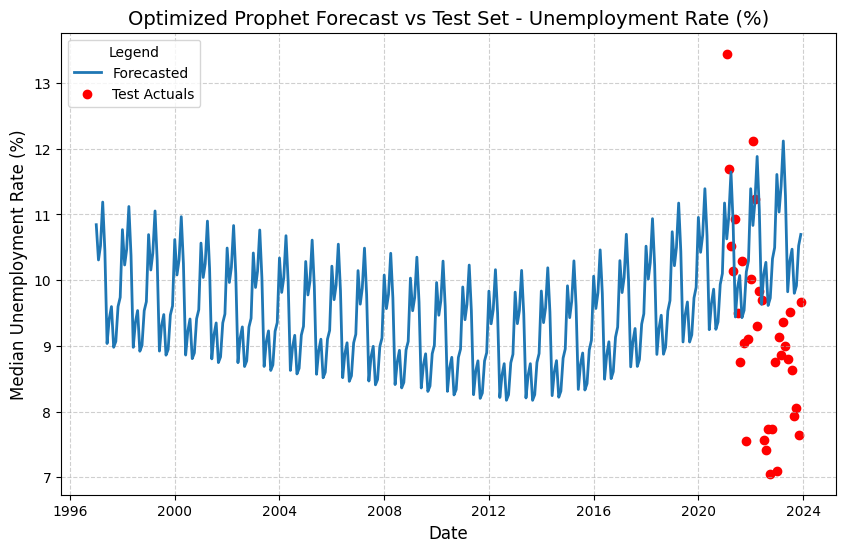

In [8]:
# Plot results
plt.figure(figsize=(10, 6))
plt.plot(forecast['ds'], forecast['yhat'], label='Forecasted', linestyle='-', linewidth=2)
plt.scatter(evaluation.index, evaluation['y'], label='Test Actuals', color='red', marker='o')
plt.title("Optimized Prophet Forecast vs Test Set - Unemployment Rate (%)", fontsize=14)
plt.xlabel("Date", fontsize=12)
plt.ylabel("Median Unemployment Rate (%)", fontsize=12)
plt.legend(title="Legend", fontsize=10)
plt.grid(visible=True, linestyle='--', alpha=0.6)
plt.show()

In [9]:
# Generate plot
fig = plot_plotly(optimized_model, forecast)

# Add labels and title
fig.update_layout(
    title="Prophet Forecast - Unemployment Rate (%)",                 
    xaxis_title="Date",                       
    yaxis_title="Median Unemployment Rate (%)",        
    legend_title="Legend",                   
    font=dict(size=12),                       
)

# Show plot
fig.show()

In [10]:
# Generate plot
fig = plot_plotly(optimized_model, forecast)

# Add test data 
fig.add_trace(
    go.Scatter(
        x=test_data['ds'],  # x-axis (test data dates)
        y=test_data['y'],  # y-axis (actual values)
        mode='markers+lines',
        name='True Values (Test Data)',
        line=dict(color='red', dash='dot'),  
        marker=dict(color='red')
    )
)

# Adjust x-axis range (2021-2023)
fig.update_layout(
    xaxis=dict(
        range=['2021-01-01', '2023-12-31'],  # Set x-axis range
        title='Date',  # Add x-axis title
    ),
    yaxis=dict(
        title='Median Unemployment Rate (%)',  # Add y-axis title
    ),
    title='Prophet Forecast with Test Data (2021-2023) - Unemployment Rate (%)',  # Add plot title
)

# Show plot
fig.show()

In [11]:
# Generate plot
fig = plot_components_plotly(optimized_model, forecast)

# Add title and labels
fig.update_layout(
    title="Prophet Forecast - Unemployment Rate (%)",     
    font=dict(size=12),                      
)       

# Show plot
fig.show()

# Optional: Download interactive plots (html)

In [ ]:
# 1. Generate the first plot
fig1 = plot_plotly(optimized_model, forecast)
fig1.update_layout(
    title="Prophet Forecast - Unemployment Rate (%)",
    xaxis_title="Date",
    yaxis_title="Median Unemployment Rate (%)",
    legend_title="Legend",
    font=dict(size=12),
)

# Save the first plot as an HTML string
html1 = pio.to_html(fig1, full_html=False)

# 2. Generate the second plot
fig2 = plot_plotly(optimized_model, forecast)
fig2.add_trace(
    go.Scatter(
        x=test_data['ds'],  # x-axis (test data dates)
        y=test_data['y'],  # y-axis (actual values)
        mode='markers+lines',
        name='True Values (Test Data)',
        line=dict(color='red', dash='dot'),
        marker=dict(color='red')
    )
)
fig2.update_layout(
    xaxis=dict(
        range=['2021-01-01', '2023-12-31'],  # Set x-axis range
        title='Date',  # Add x-axis title
    ),
    yaxis=dict(
        title='Median Unemployment Rate (%)',  # Add y-axis title
    ),
    title='Prophet Forecast with Test Data (2021-2023) - Unemployment Rate (%)',
)

# Save the second plot as an HTML string
html2 = pio.to_html(fig2, full_html=False)

# 3. Generate the third plot
fig3 = plot_components_plotly(optimized_model, forecast)
fig3.update_layout(
    title="Prophet Forecast - Components (Unemployment Rate %)",
    font=dict(size=12),
)

# Save the third plot as an HTML string
html3 = pio.to_html(fig3, full_html=False)

# Combine all HTML strings into one HTML file
combined_html = f"""
<html>
<head>
    <title>Prophet Forecast Plots</title>
</head>
<body>
    <h1>Prophet Forecast - Interactive Plots</h1>
    <h2>1. Full Forecast</h2>
    {html1}
    <h2>2. Forecast with Test Data</h2>
    {html2}
    <h2>3. Forecast Components</h2>
    {html3}
</body>
</html>
"""

# Save the combined HTML to a file
with open("FB Prophet forecast plots (unemployment).html", "w") as f:
    f.write(combined_html)

# Print a message indicating where the file is saved
print("HTML file saved as 'FB Prophet forecast plots (unemployment).html'. Open this file to view the interactive plots.")


HTML file saved as 'FB Prophet forecast plots (wage).html'. Open this file to view the interactive plots.
